# Mars test dataset
## 2023.20.03 - Hyperseti technote #10

As detailed in [Issue 73](https://github.com/UCBerkeleySETI/hyperseti/issues/73), hyperseti was failing to find high driftrate signals in Mars data. This notebook shows that relevant bugs are fixed as of hyperseti 0.3.0

### Imports

In [18]:
import hyperseti
hyperseti.__version__

'0.2.3'

In [13]:
from hyperseti.pipeline import find_et
import pylab as plt
import numpy as np
import os
import cupy as cp

### Configuration

In [ ]:
filepath = '/datax2/users/dancpr/hyperseti-test'
filename = 'guppi_59688_63255_3379455_mars_0001-beam0000.rawspec.0000.h5'

d_mars = from_h5(os.path.join(filepath, filename))

config = {
    'preprocess': {
        'sk_flag': True,                        # Apply spectral kurtosis flagging
        'normalize': True,                       # Normalize data
        'blank_edges': {'n_chan': 32},          # Blank edges channels
        'blank_extrema': {'threshold': 10000},   # Blank ridiculously bright signals before search
        'poly_fit': 3 
    },
    'dedoppler': {
        'kernel': 'ddsk',                       # Doppler + kurtosis doppler (ddsk)
        'max_dd': 40.0,                         # Maximum dedoppler delay, 5 Hz/s
        'min_dd': None,                         # 
        'apply_smearing_corr': False,            # Correct  for smearing within dedoppler kernel 
        'plan': 'stepped'                       # Dedoppler trial spacing plan (stepped = less memory)
    },
    'hitsearch': {
        'threshold': 20,                        # SNR threshold above which to consider a hit
        'min_fdistance': None                   # Automatic calculation of min. channel spacing between hits
    },
    'pipeline': {
        'n_blank':  4,                         # Number of blanking stages
        'n_boxcar': 1,                         
        'merge_boxcar_trials': True            # Merge hits at same frequency that are found in multiple boxcars
    }
}

gulp_size = 2**18 

### Run hit search

In [1]:
hit_browser = find_et(os.path.join(filepath, filename), config, 
                gulp_size=gulp_size,  
                gpu_id = 0, 
                filename_out='./mars.csv',
                sort_hits=True,
                log_output=False,
                log_config=False
                )

[find_et] find_et: hyperseti version 0.2.3
[find_et] Progress 1/192
[find_et] 	Preprocess mean:       [0.0625]
[find_et] 	Preprocess STD:        [1.35298253e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] 	 Hits in gulp: 1
[find_et] 	 Hits in gulp: 1
[find_et] Progress 2/192
[find_et] 	Preprocess mean:       [-1.875]
[find_et] 	Preprocess STD:        [1.35152896e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 3/192
[find_et] 	Preprocess mean:       [-0.125]
[find_et] 	Preprocess STD:        [1.35084052e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 4/192
[find_et] 	Preprocess mean:       [-1.0625]
[find_et] 	Preprocess STD:        [1.34879078e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 5/192
[find_et] 	Preprocess mean:       [1.75]
[find_et] 	Preprocess STD:        [1.34687058e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 6/192
[find_et] 	Preprocess mean:       [0.]
[find_et] 	Preprocess STD:        [1.345026

[find_et] 	Preprocess mean:       [-1.4375]
[find_et] 	Preprocess STD:        [1.24817654e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 53/192
[find_et] 	Preprocess mean:       [-0.09375]
[find_et] 	Preprocess STD:        [1.24847954e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 54/192
[find_et] 	Preprocess mean:       [3.25]
[find_et] 	Preprocess STD:        [1.24793293e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 55/192
[find_et] 	Preprocess mean:       [0.375]
[find_et] 	Preprocess STD:        [1.24785756e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 56/192
[find_et] 	Preprocess mean:       [-0.25]
[find_et] 	Preprocess STD:        [1.24793057e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 57/192
[find_et] 	Preprocess mean:       [0.4375]
[find_et] 	Preprocess STD:        [1.24872612e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 58/192
[find_et] 	Preprocess mean:       [-0.875

[find_et] 	Preprocess flagged:    0.00%
[find_et] 	 Hits in gulp: 1
[find_et] 	 Hits in gulp: 1
[find_et] Progress 104/192
[find_et] 	Preprocess mean:       [0.75]
[find_et] 	Preprocess STD:        [1.35957207e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 105/192
[find_et] 	Preprocess mean:       [-0.8125]
[find_et] 	Preprocess STD:        [1.36083968e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 106/192
[find_et] 	Preprocess mean:       [1.5]
[find_et] 	Preprocess STD:        [1.36373484e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 107/192
[find_et] 	Preprocess mean:       [2.25]
[find_et] 	Preprocess STD:        [1.366195e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 108/192
[find_et] 	Preprocess mean:       [-0.5]
[find_et] 	Preprocess STD:        [1.36942039e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 109/192
[find_et] 	Preprocess mean:       [1.75]
[find_et] 	Preprocess STD:        [1.3716

[find_et] 	Preprocess mean:       [3.6875]
[find_et] 	Preprocess STD:        [1.43337984e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 155/192
[find_et] 	Preprocess mean:       [0.5]
[find_et] 	Preprocess STD:        [1.43087544e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 156/192
[find_et] 	Preprocess mean:       [-1.25]
[find_et] 	Preprocess STD:        [1.43102341e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 157/192
[find_et] 	Preprocess mean:       [0.9375]
[find_et] 	Preprocess STD:        [1.42960957e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 158/192
[find_et] 	Preprocess mean:       [-0.5]
[find_et] 	Preprocess STD:        [1.42900398e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 159/192
[find_et] 	Preprocess mean:       [-2.1875]
[find_et] 	Preprocess STD:        [1.42735698e+10]
[find_et] 	Preprocess flagged:    0.00%
[find_et] Progress 160/192
[find_et] 	Preprocess mean:       [3.5]

### Look at hits returned

In [2]:
display(hit_browser)
display(hit_browser.hit_table)

< HitBrowser: b'mars' N_hits: 162 >

,drift_rate,f_start,snr,driftrate_idx,channel_idx,beam_idx,boxcar_size,n_integration
0,7.882287,8431.262632,1833.261353,417.0,39590367.0,0.0,1.0,57.0
1,7.882287,8430.762632,1833.156860,417.0,39328223.0,0.0,1.0,57.0
2,15.541190,8446.099752,626.608704,466.0,47369291.0,0.0,1.0,57.0
3,-27.029544,8407.087368,478.807983,57.0,26915566.0,0.0,1.0,57.0
4,15.541190,8446.011513,256.541504,466.0,47323028.0,0.0,1.0,57.0
...,...,...,...,...,...,...,...,...
157,15.541190,8446.307106,21.531403,466.0,47478004.0,0.0,1.0,57.0
158,15.541190,8445.840925,21.172752,466.0,47233591.0,0.0,1.0,57.0
159,15.796487,8446.254173,21.026548,467.0,47450252.0,0.0,1.0,57.0
160,15.541190,8445.601221,20.100521,466.0,47107917.0,0.0,1.0,57.0


### Hit quicklook

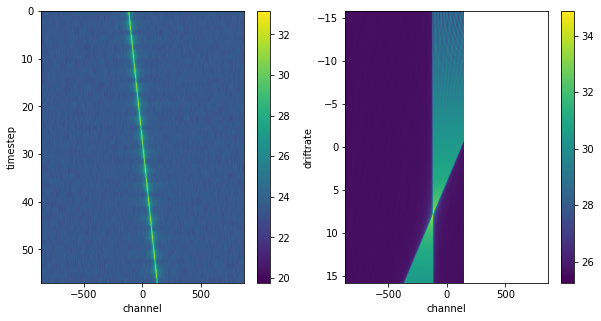

In [14]:
%matplotlib inline

plot_config = {
    'waterfall': {'apply_transform': np.log},
    'dedoppler': {'apply_transform': np.log}
}

plt.figure(figsize=(10, 5))
hit_browser.view_hit(0, padding=256, plot='dual', plot_config=plot_config)

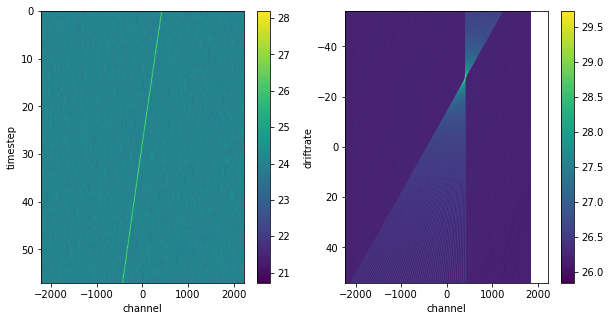

In [15]:
plt.figure(figsize=(10, 5))
hit_browser.view_hit(3, padding=128, plot='dual', plot_config=plot_config)

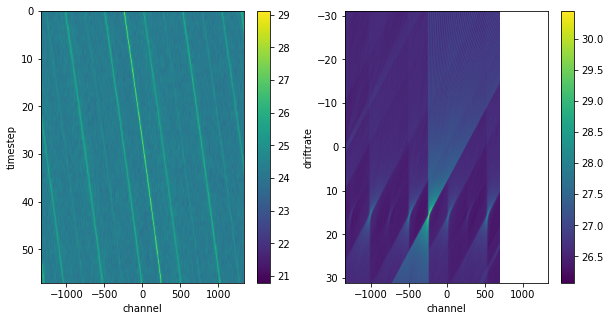

In [16]:
plt.figure(figsize=(10, 5))
hit_browser.view_hit(4, padding=128, plot='dual', plot_config=plot_config)